<h1>Импорт библиотек

In [23]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [24]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    X_array = np.array(X)
    V_array = np.array(V)[:, :, np.newaxis]
    result = np.sum(X_array * V_array, axis=0)
    return result

X = [np.array([[1, 2], [3, 4]]), np.array([[2, 3], [4, 5]])]
V = [np.array([[1], [1]]), np.array([[2], [2]])]
print(sum_prod(X, V))


[[[ 3  6]
  [ 9 12]]

 [[ 6  9]
  [12 15]]]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [25]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

def test_binarize():
    M1 = np.array([[0.4, 0.6], [0.7, 0.3]])
    assert np.array_equal(binarize(M1), np.array([[0, 1], [1, 0]]))

    M2 = np.array([[0.2, 0.4], [0.6, 0.8]])
    assert np.array_equal(binarize(M2, threshold=0.3), np.array([[0, 1], [1, 1]]))

    M3 = np.array([[0.6, 0.8], [0.9, 0.2]])
    assert np.array_equal(binarize(M3, threshold=0.7), np.array([[0, 1], [1, 0]]))

    print("Все тесты пройдены успешно!")

test_binarize()

Все тесты пройдены успешно!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [26]:
def unique_rows(mat):
    """
    Возвращает уникальные элементы из каждой строки матрицы.
    """
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    """
    Возвращает уникальные элементы из каждого столбца матрицы.
    """
    return [np.unique(col) for col in mat.T]

matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("Уникальные элементы из каждой строки матрицы:")
print(unique_rows(matrix))
print("Уникальные элементы из каждого столбца матрицы:")
print(unique_columns(matrix))


Уникальные элементы из каждой строки матрицы:
[array([1, 2, 3]), array([4, 5, 6]), array([7, 8, 9])]
Уникальные элементы из каждого столбца матрицы:
[array([1, 4, 7]), array([2, 5, 8]), array([3, 6, 9])]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Статистика по столбцам:
Мат. ожидание: [[ 4.5  7.5]
 [10.5 13.5]]
Дисперсия: [[2.25 2.25]
 [2.25 2.25]]

Статистика по строкам:
Мат. ожидание: [[ 6.  9.]
 [ 9. 12.]]
Дисперсия: [[9. 9.]
 [9. 9.]]


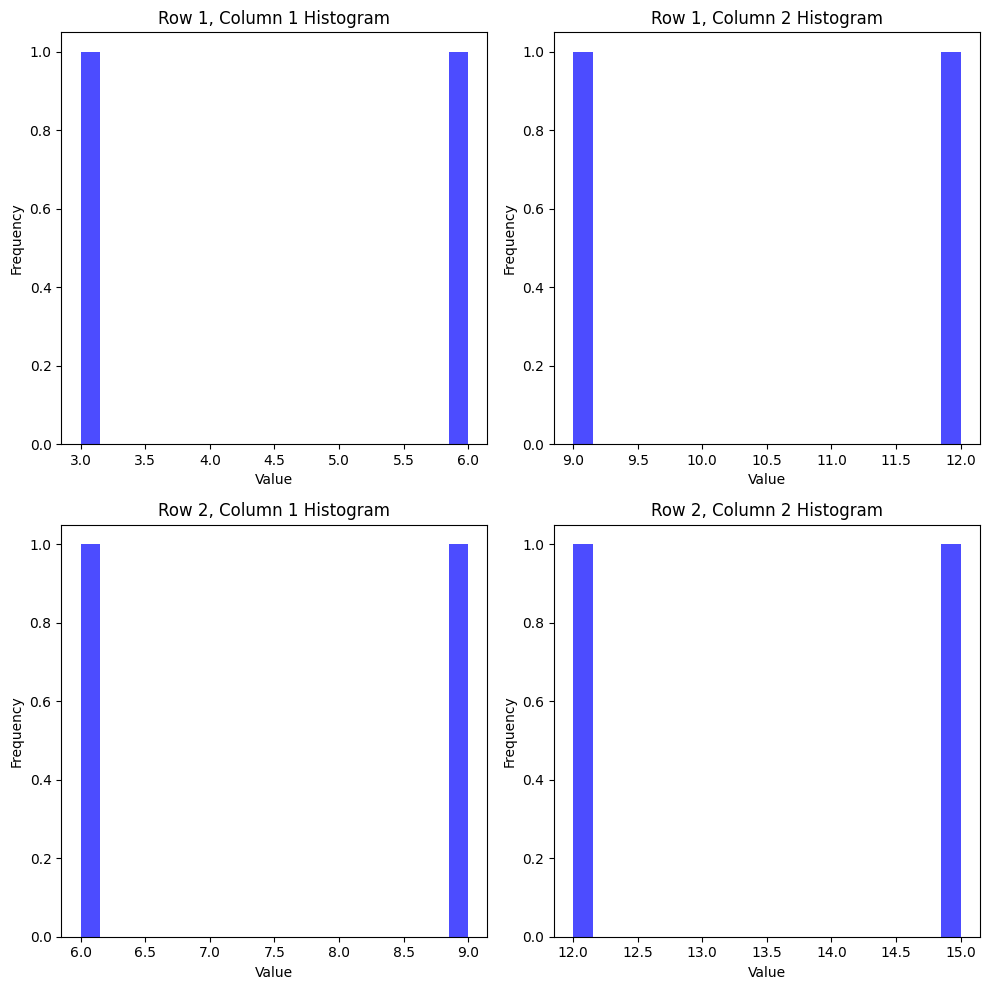

In [27]:
def fill_matrix(m, n):
    """
    Заполняет матрицу с размерами (m, n) случайными числами,
    распределенными по нормальному закону.
    """
    return np.random.randn(m, n)

def calculate_stats(matrix):
    """
    Считает мат. ожидание и дисперсию для каждого из столбцов и строк матрицы.
    """
    column_means = np.mean(matrix, axis=0)
    column_vars = np.var(matrix, axis=0)

    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)

    return {'column_means': column_means, 'column_vars': column_vars}, {'row_means': row_means, 'row_vars': row_vars}

def plot_histograms(matrix):
    """
    Строит гистограммы значений для каждой строки и столбца матрицы.
    """
    m, n, _ = matrix.shape
    fig, axs = plt.subplots(m, n, figsize=(5 * n, 5 * m))

    for i in range(m):
        for j in range(n):
            axs[i, j].hist(matrix[i, j, :], bins=20, color='blue', alpha=0.7)
            axs[i, j].set_title(f'Row {i+1}, Column {j+1} Histogram')
            axs[i, j].set_xlabel('Value')
            axs[i, j].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

matrix = np.array([[[3, 6], [9, 12]], [[6, 9], [12, 15]]])

column_stats, row_stats = calculate_stats(matrix)

print("Статистика по столбцам:")
print("Мат. ожидание:", column_stats['column_means'])
print("Дисперсия:", column_stats['column_vars'])
print()
print("Статистика по строкам:")
print("Мат. ожидание:", row_stats['row_means'])
print("Дисперсия:", row_stats['row_vars'])

plot_histograms(matrix)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [28]:
def chess(m, n, a, b):
    """
    Заполняет матрицу размером (m, n) в шахматном порядке заданными числами a и b.
    """
    matrix = np.full((m, n), b, dtype=int)
    matrix[1::2, ::2] = a
    matrix[::2, 1::2] = a
    return matrix

m = 4
n = 6
a = 3
b = 8
result_matrix = chess(m, n, a, b)
print(result_matrix)

[[8 3 8 3 8 3]
 [3 8 3 8 3 8]
 [8 3 8 3 8 3]
 [3 8 3 8 3 8]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

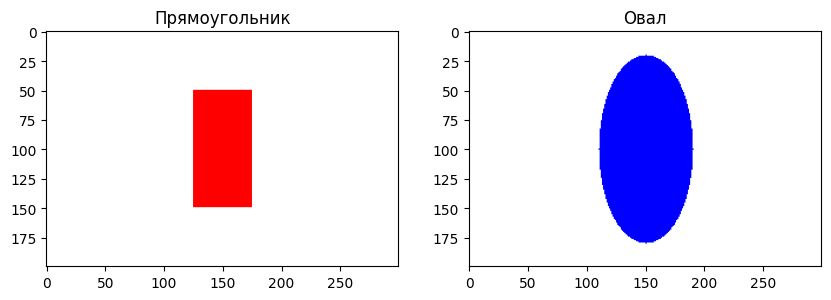

In [29]:
def draw_rectangle(image, m, n, a, b, rect_color, bg_color):
    """
    Отрисовывает прямоугольник с заданными размерами на изображении.
    """
    result_image = image.copy()

    # Создаем прямоугольник
    rect = np.ones((m, n, 3), dtype=np.uint8)
    rect[:, :] = bg_color
    x_start = (m - a) // 2
    y_start = (n - b) // 2
    x_end = x_start + a
    y_end = y_start + b
    rect[x_start:x_end, y_start:y_end] = rect_color

    # Наложение прямоугольника на изображение
    result_image = np.where(rect == bg_color, result_image, rect)

    return result_image

def draw_ellipse(image, m, n, a, b, ellipse_color, bg_color):
    """
    Отрисовывает овал с заданными полуосями на изображении.
    """
    result_image = image.copy()

    # Создаем овал
    ellipse = np.ones((m, n, 3), dtype=np.uint8)
    ellipse[:, :] = bg_color
    x_center = m // 2
    y_center = n // 2
    for x in range(m):
        for y in range(n):
            if ((x - x_center) / a) ** 2 + ((y - y_center) / b) ** 2 <= 1:
                ellipse[x, y] = ellipse_color

    result_image = np.where(ellipse == bg_color, result_image, ellipse)

    return result_image

m = 200
n = 300
image = np.ones((m, n, 3), dtype=np.uint8) * 255

rectangle_color = (255, 0, 0)  # Красный цвет
background_color = (255, 255, 255)  # Белый фон
a = 100
b = 50
image_with_rectangle = draw_rectangle(image, m, n, a, b, rectangle_color, background_color)

ellipse_color = (0, 0, 255)  # Синий цвет
a = 80
b = 40
image_with_ellipse = draw_ellipse(image, m, n, a, b, ellipse_color, background_color)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_with_rectangle)
plt.title('Прямоугольник')

plt.subplot(1, 2, 2)
plt.imshow(image_with_ellipse)
plt.title('Овал')

plt.show()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [30]:
def find_local_extrema(series):
    """
    Находит локальные максимумы и минимумы в ряде.
    """
    local_maxima_indices = np.where((series[1:-1] > series[:-2]) & (series[1:-1] > series[2:]))[0] + 1
    local_minima_indices = np.where((series[1:-1] < series[:-2]) & (series[1:-1] < series[2:]))[0] + 1
    return local_maxima_indices, local_minima_indices

time_series = np.array([3, 6, 2, 8, 5, 7, 9, 4, 10, 6, 12, 8, 11])

mean = np.mean(time_series)
variance = np.var(time_series)
std_deviation = np.std(time_series)

local_maxima_indices, local_minima_indices = find_local_extrema(time_series)
local_maxima = time_series[local_maxima_indices]
local_minima = time_series[local_minima_indices]

print(f"Математическое ожидание: {mean}")
print(f"Дисперсия: {variance}")
print(f"Стандартное отклонение: {std_deviation}")
print(f"Локальные максимумы: {local_maxima}")
print(f"Локальные минимумы: {local_minima}")

Математическое ожидание: 7.0
Дисперсия: 8.615384615384615
Стандартное отклонение: 2.935197542821371
Локальные максимумы: [ 6  8  9 10 12]
Локальные минимумы: [2 5 4 6 8]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [31]:
def one_hot_encoding(labels, num_classes=None):
    """
    Выполняет one-hot-encoding для данного вектора с целочисленными метками классов.
    """
    if num_classes is None:
        num_classes = np.max(labels) + 1
    one_hot_matrix = np.zeros((len(labels), num_classes), dtype=int)
    for i, label in enumerate(labels):
        one_hot_matrix[i, label] = 1
    return one_hot_matrix

labels = np.array([0, 2, 3, 0])
one_hot_matrix = one_hot_encoding(labels)
print(one_hot_matrix)


[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
